In [101]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
import numpy as np
import pandas as pd
import pylab 
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
#import model_evaluation_utils as meu
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from itertools import combinations
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score



Data Field Descriptions
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [102]:
import pandas as pd
df = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [103]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [105]:
df.loc[df['Destination']=='TRAPPIST-1e', 'Destination'] ='T'
df.loc[df['Destination']=='55 Cancri e', 'Destination'] ='C'
df.loc[df['Destination']=='PSO J318.5-22', 'Destination'] ='P'







In [106]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,T,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,T,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,T,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,T,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,T,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,C,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,P,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,T,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,C,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## Detail look at what train_dataset is missing


In [107]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
CryoSleep,217,2.5
ShoppingMall,208,2.4
VIP,203,2.3
HomePlanet,201,2.3
Name,200,2.3
Cabin,199,2.3
VRDeck,188,2.2
FoodCourt,183,2.1
Spa,183,2.1
Destination,182,2.1


## Data Visualization

### --> Transported

<AxesSubplot:xlabel='Transported', ylabel='count'>

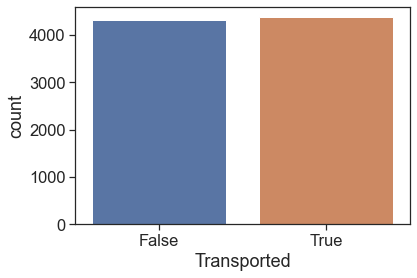

In [108]:
import seaborn as sns
sns.countplot(df['Transported'])

### --> Destination, VIP , CryoSleep, HomePlanet

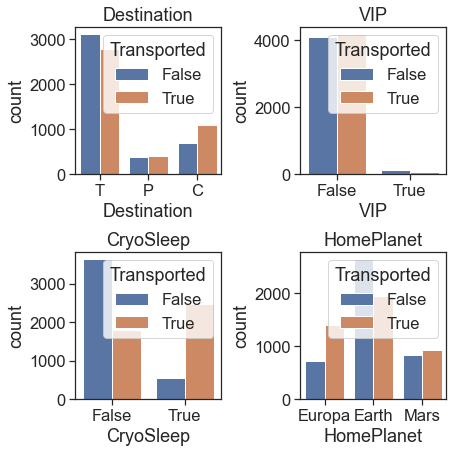

In [109]:
#Visualizing the count of survivor for columns 'age', sex', 'pclass', 'sibsp', 'parch', 'embarked'
from matplotlib import pyplot as plt
import seaborn as sns
columns = ['Destination','VIP','CryoSleep','HomePlanet' ]

num_of_rows = 2 
num_of_columns = 2

#The subplot grid and figure size of each graph

fig, axs = plt.subplots(num_of_rows,num_of_columns, figsize = (num_of_columns*3.2,num_of_rows*3.2 ))

for row in range(0,num_of_rows):
    for column in range(0,num_of_columns):
        i = row*num_of_columns + column #Index to go through the number of columns
        ax = axs[row][column] # Show where to position each subplots
        sns.countplot(df[columns[i]], hue =df['Transported'] , ax=ax)
        ax.set_title(columns[i])
        ax.legend(title = 'Transported', loc = 'upper right')
        
plt.tight_layout()

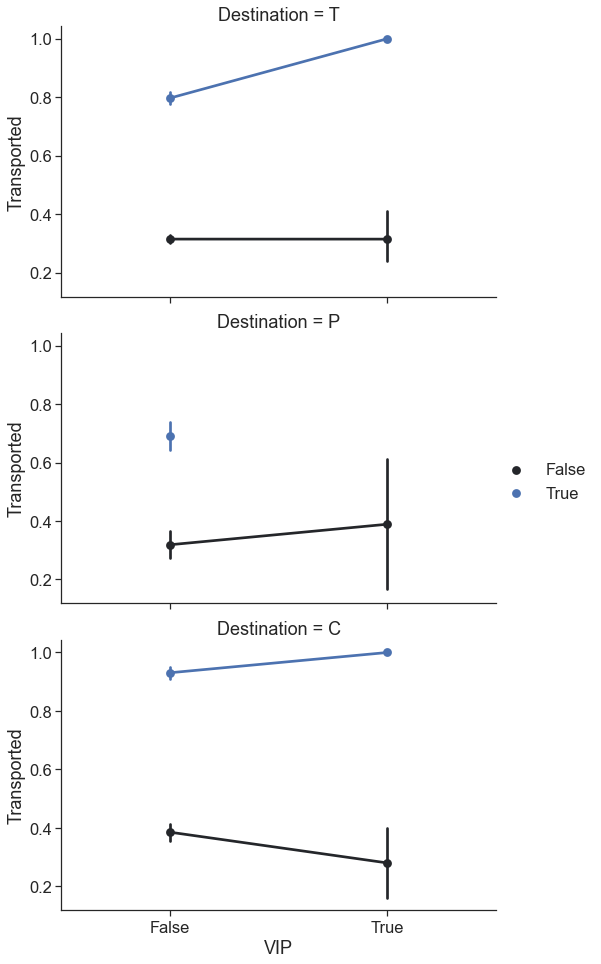

In [110]:
FacetGrid = sns.FacetGrid(df, row='Destination', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'VIP', 'Transported', 'CryoSleep', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()
plt.show()

# Setting Features and Target

In [50]:
from sklearn.model_selection import train_test_split

Features = df.drop(['Transported'], axis = 1)
Target = df['Transported']

# Data Imputing / Cleaning

### Now let's build our preprocessing pipelines

#### Pipeline for numerical attributes:

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

### Pipeline for the categorical attributes:

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

#### Joining numerical and categorical pipelines

In [55]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "RoomService", "FoodCourt", "ShoppingMall","Spa","VRDeck"]
cat_attribs = ["HomePlanet", "VIP", "CryoSleep","Destination"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])




In [56]:
Attributes = preprocess_pipeline.fit_transform(
    Features[num_attribs + cat_attribs])
Attributes

array([[ 0.71194537, -0.33310466, -0.28102673, ...,  0.        ,
         0.        ,  1.        ],
       [-0.33403748, -0.16807343, -0.27538657, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.03685698, -0.2680006 ,  1.95999765, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1945731 , -0.33310466, -0.28102673, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.22382004, -0.33310466,  0.37636549, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.06060632, -0.14233462,  2.656871  , ...,  0.        ,
         0.        ,  1.        ]])

# Splitting the Data into Training and Test Data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(Attributes, Target, test_size=0.25, random_state=42)


# Machine Learning Model

In [64]:
def all_models(X_train, y_train):
    #Use Logistic Regression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    #Use KNeighbors
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p =2)
    knn.fit(X_train, y_train)
    
    #Use SVC (Linear Kernel)
    svc_lin = SVC(kernel = 'linear', random_state =0)
    svc_lin.fit(X_train, y_train)
    
    #Use SVC (RBF Kernel)
    svc_rbf = SVC(kernel = 'rbf', random_state =0)
    svc_rbf.fit(X_train, y_train)
    

    
    #Use GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)
    
    #Use Decision Tree
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state =0)
    tree.fit(X_train, y_train)
    
    #Use RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state =0)
    forest.fit(X_train, y_train)
    
    
    #USe XGBClassifier
   
    #xgb = XGBClassifier()
    #xgb.fit(X_train, y_train)
    
    #Use SGDClassifier
    sgd = SGDClassifier()
    sgd.fit(X_train,y_train)
    
    #Use AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(X_train, y_train)
    
    #Print the Accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, y_train))
    print('[1]K Neighbors Regression Training Accuracy: ', knn.score(X_train, y_train))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, y_train))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, y_train))
    print('[4]GaussianNB Training Accuracy: ', gauss.score(X_train, y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, y_train))
    
    #print('[8]XGBClassifier Training Accuracy: ', xgb.score(X_train, y_train))
    print('[7]SGDClassifier Training Accuracy: ', sgd.score(X_train, y_train))
    print('[8]AdaBoostClassifier Training Accuracy: ', ada.score(X_train, y_train))
    

    
    return log,knn,svc_lin,svc_rbf,gauss,tree,forest,sgd,ada

In [65]:
models = all_models(X_train, y_train)

[0]Logistic Regression Training Accuracy:  0.7899984660223961
[1]K Neighbors Regression Training Accuracy:  0.8166896763307255
[2]SVC Linear Training Accuracy:  0.7841693511274735
[3]SVC RBF Training Accuracy:  0.7973615585212456
[4]GaussianNB Training Accuracy:  0.731553919312778
[5]Decision Tree Training Accuracy:  0.9328117809479981
[6]Random Forest Training Accuracy:  0.9220739377205093
[7]SGDClassifier Training Accuracy:  0.7841693511274735
[8]AdaBoostClassifier Training Accuracy:  0.8004295137290995


In [77]:
dframe=pd.DataFrame(columns=['Name', 'train_accuracy', 'test_accuracy','Precision','Recall','Specificity'])

In [86]:
def train_test_evaluate_model(model,name):
    global dframe
    print("------------------------------------------------------------------------------------")
    print(name)
    model.fit(X_train,y_train)
    print("Train score :")
    train_score=model.score(X_train,y_train)
    print(train_score)
    predict= model.predict(X_test)
    print("Test score :")
    test_score=accuracy_score(y_test,predict)
    print(test_score)
    print("Confusion Matrix :")
    print(confusion_matrix(y_test,predict))
    print("Classification Report :")
    print(classification_report(y_test,predict))
#     print(scores)

    
    confusion__matrix = pd.crosstab(y_test,predict , rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion__matrix, annot=True)
    plt.show()
    cm=confusion_matrix(y_test,predict)
    tp = cm[1,1]
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    print("Accuracy : ",(tp+tn)/(tp+tn+fp+fn))
    print("Precision : ",(tp)/(tp+fp))
    print("Recall/TPR/Sensitivity : ",(tp)/(tp+fn))
    print("Specificity/TNR : ",(tn)/(tn+fp))
    print("------------------------------------------------------------------------------------")
    new_row = {'Name':name, 'train_accuracy': train_score , 'test_accuracy': test_score ,'Precision': (tp)/(tp+fp) \
               ,'Recall': (tp)/(tp+fn) ,'Specificity': (tn)/(tn+fp) }
    #append row to the dataframe
    dframe = dframe.append(new_row, ignore_index=True)

# LogisticRegression

------------------------------------------------------------------------------------
LogisticRegression
Train score :
0.7899984660223961
Test score :
0.7769089236430543
Confusion Matrix :
[[813 269]
 [216 876]]
Classification Report :
              precision    recall  f1-score   support

       False       0.79      0.75      0.77      1082
        True       0.77      0.80      0.78      1092

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174



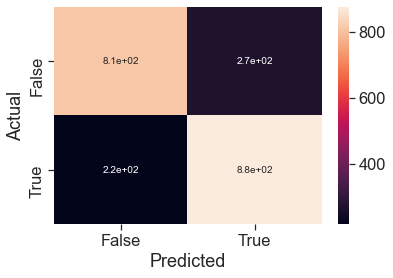

Accuracy :  0.7769089236430543
Precision :  0.7650655021834061
Recall/TPR/Sensitivity :  0.8021978021978022
Specificity/TNR :  0.7513863216266173
------------------------------------------------------------------------------------


In [87]:
train_test_evaluate_model(LogisticRegression(solver='lbfgs', max_iter=1200),"LogisticRegression")

# DecisionTreeClassifier

------------------------------------------------------------------------------------
DecisionTreeClassifier
Train score :
0.9328117809479981
Test score :
0.7364305427782889
Confusion Matrix :
[[761 321]
 [252 840]]
Classification Report :
              precision    recall  f1-score   support

       False       0.75      0.70      0.73      1082
        True       0.72      0.77      0.75      1092

    accuracy                           0.74      2174
   macro avg       0.74      0.74      0.74      2174
weighted avg       0.74      0.74      0.74      2174



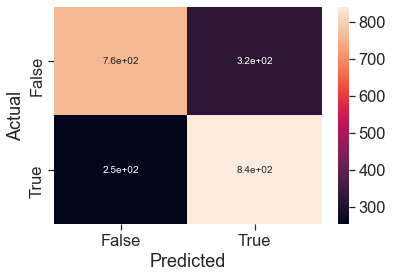

Accuracy :  0.7364305427782889
Precision :  0.7235142118863049
Recall/TPR/Sensitivity :  0.7692307692307693
Specificity/TNR :  0.7033271719038817
------------------------------------------------------------------------------------


In [88]:
from sklearn.tree import DecisionTreeClassifier
train_test_evaluate_model(DecisionTreeClassifier(criterion='entropy'),"DecisionTreeClassifier")

# RandomForestClassifier

------------------------------------------------------------------------------------
RandomForestClassifier
Train score :
0.9130234698573401
Test score :
0.7598896044158233
Confusion Matrix :
[[791 291]
 [231 861]]
Classification Report :
              precision    recall  f1-score   support

       False       0.77      0.73      0.75      1082
        True       0.75      0.79      0.77      1092

    accuracy                           0.76      2174
   macro avg       0.76      0.76      0.76      2174
weighted avg       0.76      0.76      0.76      2174



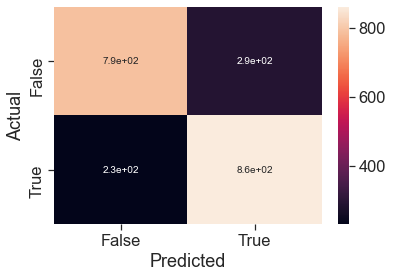

Accuracy :  0.7598896044158233
Precision :  0.7473958333333334
Recall/TPR/Sensitivity :  0.7884615384615384
Specificity/TNR :  0.7310536044362292
------------------------------------------------------------------------------------


In [89]:
from sklearn.ensemble import RandomForestClassifier
train_test_evaluate_model(RandomForestClassifier(n_estimators=5),"RandomForestClassifier")

# KNeighborsClassifier

------------------------------------------------------------------------------------
KNeighborsClassifier
Train score :
0.8166896763307255
Test score :
0.765409383624655
Confusion Matrix :
[[832 250]
 [260 832]]
Classification Report :
              precision    recall  f1-score   support

       False       0.76      0.77      0.77      1082
        True       0.77      0.76      0.77      1092

    accuracy                           0.77      2174
   macro avg       0.77      0.77      0.77      2174
weighted avg       0.77      0.77      0.77      2174



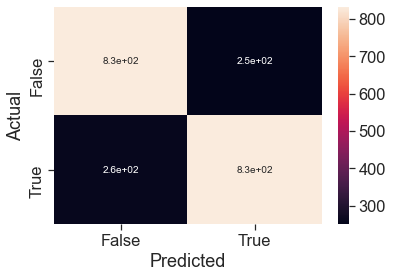

Accuracy :  0.765409383624655
Precision :  0.7689463955637708
Recall/TPR/Sensitivity :  0.7619047619047619
Specificity/TNR :  0.7689463955637708
------------------------------------------------------------------------------------


In [90]:
from sklearn.neighbors import KNeighborsClassifier
train_test_evaluate_model(KNeighborsClassifier(n_neighbors=5),"KNeighborsClassifier")

# GaussianNB

------------------------------------------------------------------------------------
GaussianNB
Train score :
0.731553919312778
Test score :
0.7364305427782889
Confusion Matrix :
[[611 471]
 [102 990]]
Classification Report :
              precision    recall  f1-score   support

       False       0.86      0.56      0.68      1082
        True       0.68      0.91      0.78      1092

    accuracy                           0.74      2174
   macro avg       0.77      0.74      0.73      2174
weighted avg       0.77      0.74      0.73      2174



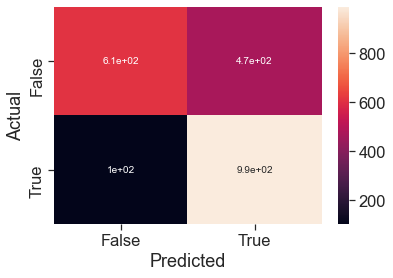

Accuracy :  0.7364305427782889
Precision :  0.6776180698151951
Recall/TPR/Sensitivity :  0.9065934065934066
Specificity/TNR :  0.5646950092421442
------------------------------------------------------------------------------------


In [91]:
from sklearn.naive_bayes import GaussianNB
train_test_evaluate_model(GaussianNB(),"GaussianNB")

# SVC

------------------------------------------------------------------------------------
SVC
Train score :
0.7973615585212456
Test score :
0.7870285188592456
Confusion Matrix :
[[822 260]
 [203 889]]
Classification Report :
              precision    recall  f1-score   support

       False       0.80      0.76      0.78      1082
        True       0.77      0.81      0.79      1092

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174



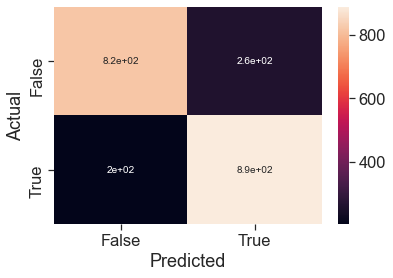

Accuracy :  0.7870285188592456
Precision :  0.7737162750217581
Recall/TPR/Sensitivity :  0.8141025641025641
Specificity/TNR :  0.7597042513863216
------------------------------------------------------------------------------------


In [92]:
from sklearn.svm import SVC
train_test_evaluate_model(SVC(),"SVC")

# AdaBoostClassifier

------------------------------------------------------------------------------------
AdaBoostClassifier
Train score :
0.8004295137290995
Test score :
0.7782888684452622
Confusion Matrix :
[[791 291]
 [191 901]]
Classification Report :
              precision    recall  f1-score   support

       False       0.81      0.73      0.77      1082
        True       0.76      0.83      0.79      1092

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174



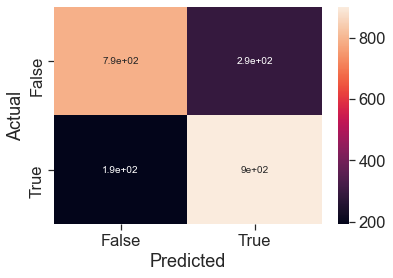

Accuracy :  0.7782888684452622
Precision :  0.7558724832214765
Recall/TPR/Sensitivity :  0.825091575091575
Specificity/TNR :  0.7310536044362292
------------------------------------------------------------------------------------


In [93]:
train_test_evaluate_model(AdaBoostClassifier(),"AdaBoostClassifier")

# SGDClassifier

------------------------------------------------------------------------------------
SGDClassifier
Train score :
0.7850897376898297
Test score :
0.7718491260349586
Confusion Matrix :
[[814 268]
 [228 864]]
Classification Report :
              precision    recall  f1-score   support

       False       0.78      0.75      0.77      1082
        True       0.76      0.79      0.78      1092

    accuracy                           0.77      2174
   macro avg       0.77      0.77      0.77      2174
weighted avg       0.77      0.77      0.77      2174



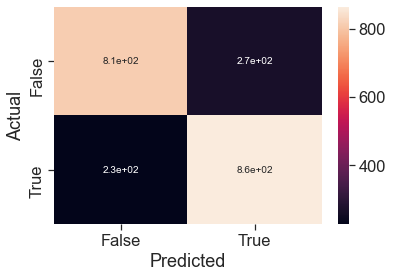

Accuracy :  0.7718491260349586
Precision :  0.7632508833922261
Recall/TPR/Sensitivity :  0.7912087912087912
Specificity/TNR :  0.7523105360443623
------------------------------------------------------------------------------------


In [94]:
train_test_evaluate_model(SGDClassifier(),"SGDClassifier")

In [95]:
dframe

,Name,train_accuracy,test_accuracy,Precision,Recall,Specificity
0,LogisticRegression,0.789998,0.776909,0.765066,0.802198,0.751386
1,DecisionTreeClassifier,0.932812,0.736431,0.723514,0.769231,0.703327
2,RandomForestClassifier,0.913023,0.75989,0.747396,0.788462,0.731054
3,KNeighborsClassifier,0.81669,0.765409,0.768946,0.761905,0.768946
4,GaussianNB,0.731554,0.736431,0.677618,0.906593,0.564695
5,SVC,0.797362,0.787029,0.773716,0.814103,0.759704
6,AdaBoostClassifier,0.80043,0.778289,0.755872,0.825092,0.731054
7,SGDClassifier,0.78509,0.771849,0.763251,0.791209,0.752311


### Evaluation Using Cross-Validation

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
score = np.zeros((8,2))
mean_score =[]
allscores =[]
model = [LogisticRegression(),DecisionTreeClassifier(),
         RandomForestClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(),
         SGDClassifier(),AdaBoostClassifier()]
for i in model:
    scores = cross_val_score(i, X_train, y_train, cv=10)
    mean = scores.mean()
    allscores.append(scores)
    mean_score.append(mean)
    print('{}: {}'.format(i, scores.mean()))

LogisticRegression(): 0.7893877281765664
DecisionTreeClassifier(): 0.7433655631261015
RandomForestClassifier(): 0.7873931563521905
KNeighborsClassifier(): 0.7660727243598805
GaussianNB(): 0.7320196394409733
SVC(): 0.7860127882540311
SGDClassifier(): 0.7751234532997842
AdaBoostClassifier(): 0.789234589541338


In [98]:
np.savetxt('My_Score', score)
Score_data = np.loadtxt('My_Score')
My_Scores = pd.DataFrame(Score_data, columns = ['Models', 'Cross Validation Scores'])

My_Scores['Models'] = model
My_Scores['Cross Validation Scores'] = mean_score
#My_Scores['Best']= ['','','','','','Best Model','','',"Second Best",'']
My_Scores

,Models,Cross Validation Scores
0,LogisticRegression(),0.789388
1,DecisionTreeClassifier(),0.743366
2,RandomForestClassifier(),0.787393
3,KNeighborsClassifier(),0.766073
4,GaussianNB(),0.732020
5,SVC(),0.786013
6,SGDClassifier(),0.775123
7,AdaBoostClassifier(),0.789235


## Compare Training Accuracy after Cross Validation with Testing Accuracy

In [99]:
Accurracy_Score = np.zeros((8,3))

In [100]:
Accurracy_Score[:,0] = df['train_accuracy']
Accurracy_Score[:,1]=My_Scores['Cross Validation Scores']
Accurracy_Score[:,2] = df['test_accuracy']

np.savetxt('Accuracy_Scores', Accurracy_Score)
data_accuracy = np.loadtxt('Accuracy_Scores')

Accuracy_data = pd.DataFrame(data_accuracy, columns=['train_accuracy', 'Cross Validation', 'test_accuracy'])
Accuracy_data['Model'] = df['Name']
Accuracy_data



,train_accuracy,Cross Validation,test_accuracy,Model
0,0.789998,0.789388,0.776909,LogisticRegression
1,0.932812,0.743366,0.739190,DecisionTreeClassifier
2,0.912103,0.787393,0.755750,RandomForestClassifier
3,0.816690,0.766073,0.765409,KNeighborsClassifier
4,0.731554,0.732020,0.736431,GaussianNB
5,0.797362,0.786013,0.787029,SVC
6,0.800430,0.775123,0.778289,AdaBoostClassifier
7,0.783556,0.789235,0.777829,SGDClassifier


In [128]:
X_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [130]:


test_dataset.loc[test_dataset['Destination']=='TRAPPIST-1e', 'Destination'] ='T'
test_dataset.loc[test_dataset['Destination']=='55 Cancri e', 'Destination'] ='C'
test_dataset.loc[test_dataset['Destination']=='PSO J318.5-22', 'Destination'] ='P'

In [132]:
X_test= test_dataset.drop(columns =['PassengerId','Name'])

In [133]:
X_data_test = preprocess_pipeline.transform(X_test[num_attribs + cat_attribs])
X_test_Prediction = models[2].predict(X_data_test)

In [134]:
X_test_Prediction

array([ True, False,  True, ...,  True,  True,  True])

In [135]:
MySurvival = pd.DataFrame(test_dataset['PassengerId'])
MySurvival['Transported'] = X_test_Prediction

MySurvival.to_csv('Transported.csv', index=False)

### Results

In [136]:
MyResult = pd.read_csv('Transported.csv')

In [137]:
MyResult['Outcome'] = MyResult['Transported']

In [140]:
MyResult.loc[MyResult['Transported']== 0, 'Outcome']='Not Transported 😭'
MyResult.loc[MyResult['Transported']== 1, 'Outcome']='Transported 🤩'

In [141]:
MyResult.head(20)

,PassengerId,Transported,Outcome
0,0013_01,True,Transported 🤩
1,0018_01,False,Not Transported 😭
2,0019_01,True,Transported 🤩
3,0021_01,True,Transported 🤩
4,0023_01,True,Transported 🤩
5,0027_01,True,Transported 🤩
6,0029_01,True,Transported 🤩
7,0032_01,True,Transported 🤩
8,0032_02,True,Transported 🤩
9,0033_01,False,Not Transported 😭
